## Time-Based Content Growth Analysis

####*(Based on: `last_updated_year`, `last_updated_month`, `last_updated_date`)*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go


df = pd.read_csv('https://github.com/AshishJangra27/datasets/raw/main/GFG%20Articles%20Latest/gfg_articles_clean_data_for_dashboarding.csv')
df.head()

,title,last_updated,last_updated_date,last_updated_month,last_updated_year,clean_tags,day_of_week,no_of_images
0,Capgemini Interview Experience | On-Campus 202...,28 October 2020,28,October,2020,Interview Experiences,Wednesday,0
1,Optum(UHG) Interview Experience for Internship...,28 October 2020,28,October,2020,Interview Experiences,Wednesday,0
2,Amdocs Interview Experience (On-Campus),28 October 2020,28,October,2020,Interview Experiences,Wednesday,0
3,Capgemini Interview Experience | On-Campus (Vi...,27 October 2020,27,October,2020,Interview Experiences,Tuesday,0
4,SRIB Interview Experience for Internship 2020,23 July 2025,23,July,2025,Interview Experiences,Wednesday,0


In [2]:
#1. How many articles were updated or published in each year?
import pandas as pd

# Count articles per year
articles_per_year = (
    df.groupby('last_updated_year')
      .size()
      .reset_index(name='total_articles')
      .sort_values('last_updated_year')
)

print(articles_per_year)


    last_updated_year  total_articles
0                2010               1
1                2014              37
2                2015              93
3                2016              98
4                2017             421
5                2018            2432
6                2019            6094
7                2020            8187
8                2021           10708
9                2022           12713
10               2023           14405
11               2024           16372
12               2025          102689


In [ ]:
#2. What is the year-over-year growth rate of content volume?
articles_per_year['yoy_growth_%'] = (
    articles_per_year['total_articles']
    .pct_change() * 100
)

print(articles_per_year)


    last_updated_year  total_articles  yoy_growth_%
0                2010               1           NaN
1                2014              37   3600.000000
2                2015              93    151.351351
3                2016              98      5.376344
4                2017             421    329.591837
5                2018            2432    477.672209
6                2019            6094    150.575658
7                2020            8187     34.345258
8                2021           10708     30.792720
9                2022           12713     18.724318
10               2023           14405     13.309211
11               2024           16372     13.654981
12               2025          102689    527.223308


In [ ]:
#3. Which years experienced the highest increase in content updates?
articles_per_year['yoy_increase'] = (
    articles_per_year['total_articles']
    .diff()
)

max_increase = articles_per_year['yoy_increase'].max()

highest_growth_years = articles_per_year[
    articles_per_year['yoy_increase'] == max_increase
]

print(highest_growth_years)


    last_updated_year  total_articles  yoy_growth_%  yoy_increase
12               2025          102689    527.223308       86317.0


In [8]:
#4.  Are there years with unusually low publishing activity?
average_articles = articles_per_year['total_articles'].mean()

low_activity_years = articles_per_year[
    articles_per_year['total_articles'] < average_articles
]

print(low_activity_years)


   last_updated_year  total_articles  yoy_growth_%  yoy_increase
0               2010               1           NaN           NaN
1               2014              37   3600.000000          36.0
2               2015              93    151.351351          56.0
3               2016              98      5.376344           5.0
4               2017             421    329.591837         323.0
5               2018            2432    477.672209        2011.0
6               2019            6094    150.575658        3662.0
7               2020            8187     34.345258        2093.0
8               2021           10708     30.792720        2521.0
9               2022           12713     18.724318        2005.0


In [10]:
#5. How does content volume in recent years compare with earlier years?
N = 3  # last 3 years

latest_year = articles_per_year['last_updated_year'].max()

articles_per_year['period'] = articles_per_year['last_updated_year'].apply(
    lambda x: 'Recent Years' if x >= latest_year - N + 1 else 'Earlier Years'
)
comparison = (
    articles_per_year
    .groupby('period')['total_articles']
    .agg(
        total_articles='sum',
        avg_articles_per_year='mean',
        max_articles='max'
    )
    .reset_index()
)

print(comparison)


          period  total_articles  avg_articles_per_year  max_articles
0  Earlier Years           40784            4078.400000         12713
1   Recent Years          133466           44488.666667        102689


In [11]:
#6. What is the monthly distribution of content updates across all years?

monthly_distribution = (
    df.groupby('last_updated_month')
      .size()
      .reset_index(name='total_articles')
      .sort_values('last_updated_month')
)

print(monthly_distribution)

   last_updated_month  total_articles
0               April            9518
1              August           11071
2            December            6474
3            February            4764
4             January            6521
5                July           93380
6                June            6552
7               March            5908
8                 May            8125
9            November            6654
10            October            7155
11          September            8128


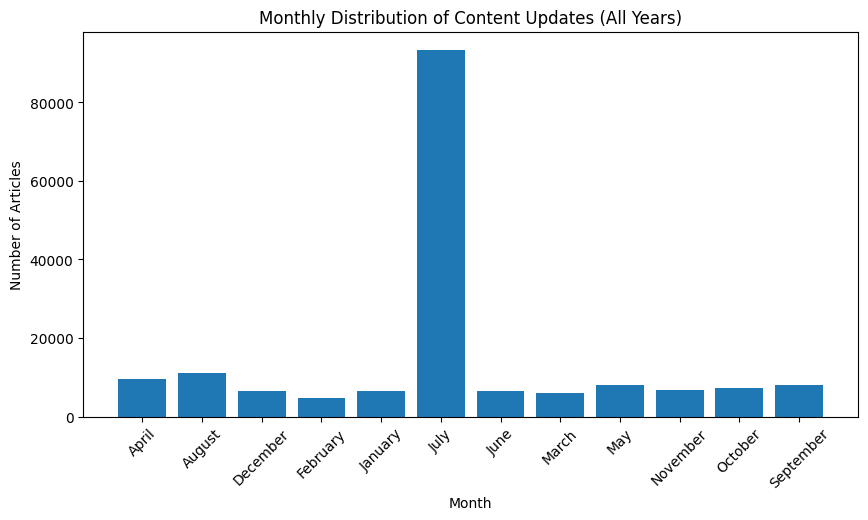

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(
    monthly_distribution['last_updated_month'],
    monthly_distribution['total_articles']
)
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.title('Monthly Distribution of Content Updates (All Years)')
plt.xticks(rotation=45)
plt.show()


In [18]:
#7. Are certain months consistently associated with higher content activity?
import pandas as pd

# If you have a full date column
df['last_updated_date'] = pd.to_datetime(df['last_updated_date'])

monthly_activity = (
    df.groupby(df['last_updated_date'].dt.month)
      .size()
      .reset_index(name='total_articles')
      .rename(columns={'last_updated_date': 'month'})
)

# Add month names
monthly_activity['month_name'] = pd.to_datetime(
    monthly_activity['month'], format='%m'
).dt.strftime('%B')

print(monthly_activity)


   month  total_articles month_name
0      1          174250    January


In [30]:
#8. Do technical articles and interview articles follow similar yearly trends?
import pandas as pd

filtered_df = df[df['title'].isin(['Technical', 'Interview'])]

yearly_counts = (
    filtered_df
    .groupby(['last_updated_year', 'title'])
    .size()
    .reset_index(name='total_articles')
)


In [32]:
pivot_df = yearly_counts.pivot(
    index='last_updated_year',
    columns='title',
    values='total_articles'
).fillna(0)

print(pivot_df)


Empty DataFrame
Columns: []
Index: []
